<a href="https://colab.research.google.com/github/dimou-gk/Deep-dive-ML/blob/main/Semi_Supervised_%26_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [30]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset & Analysis

In [32]:
df = pd.read_csv('/content/drive/MyDrive/MSc Data and Web Science/Machine Learning/Exercise 4 & 5/wine-missing.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Create Plots

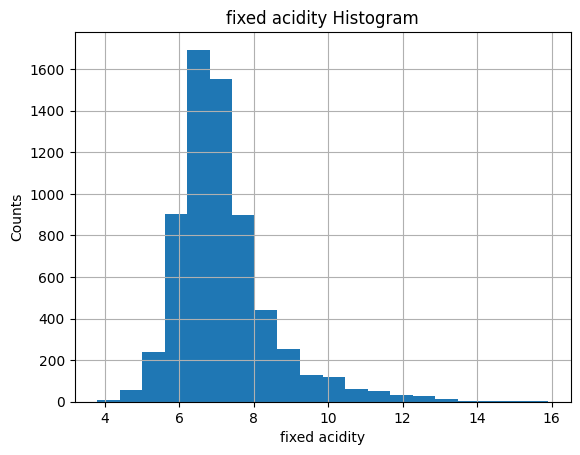

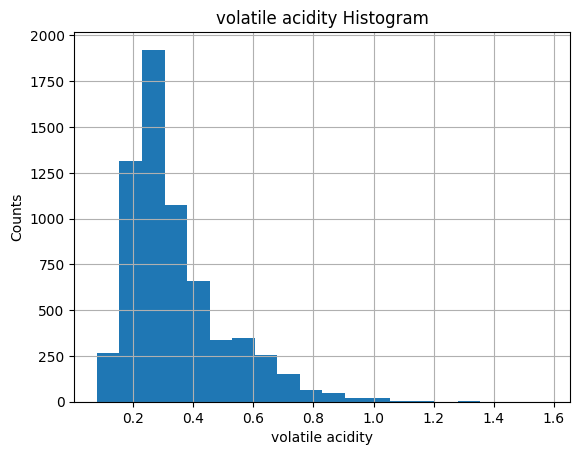

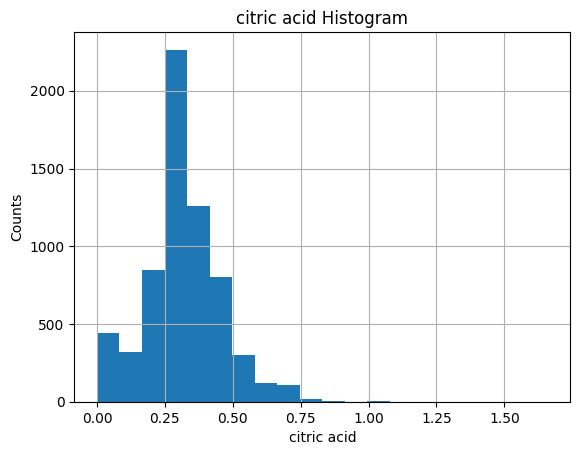

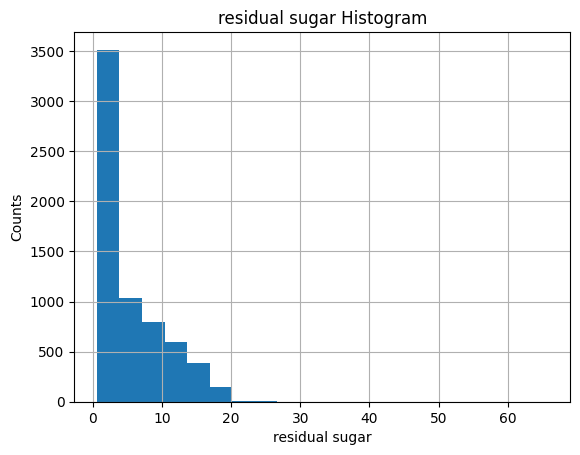

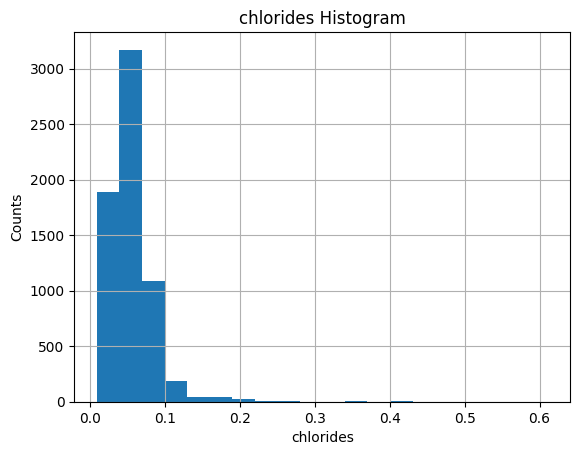

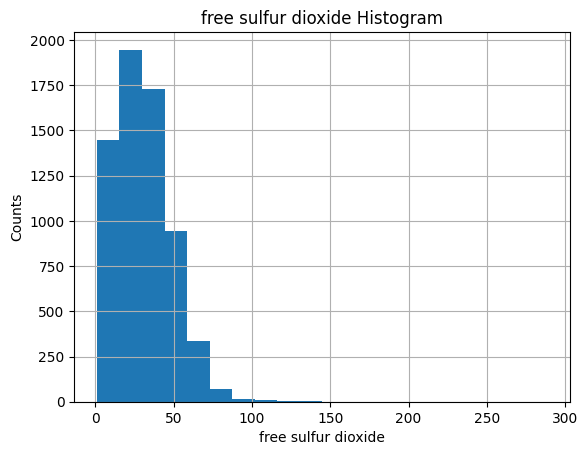

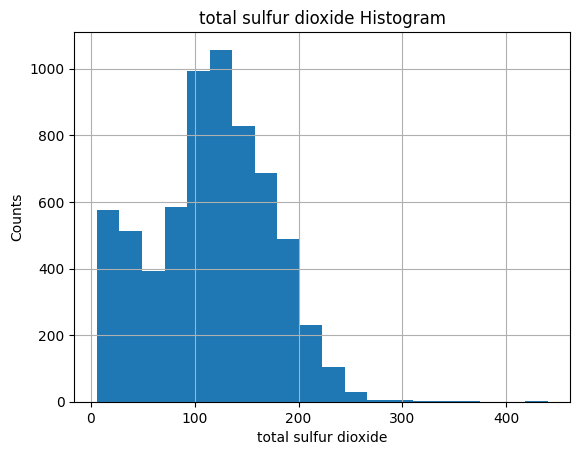

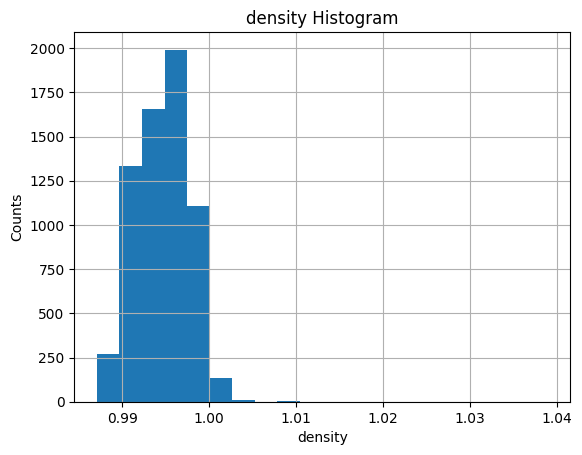

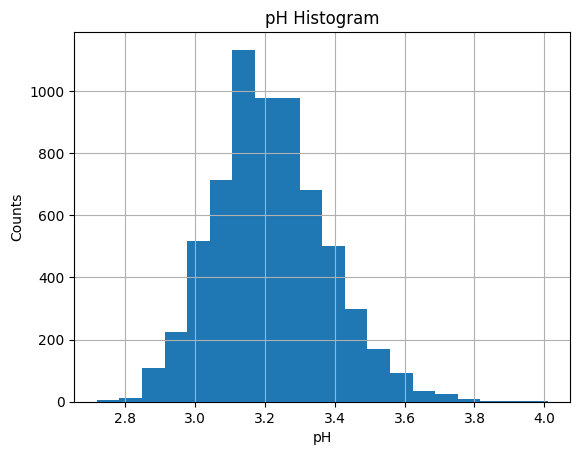

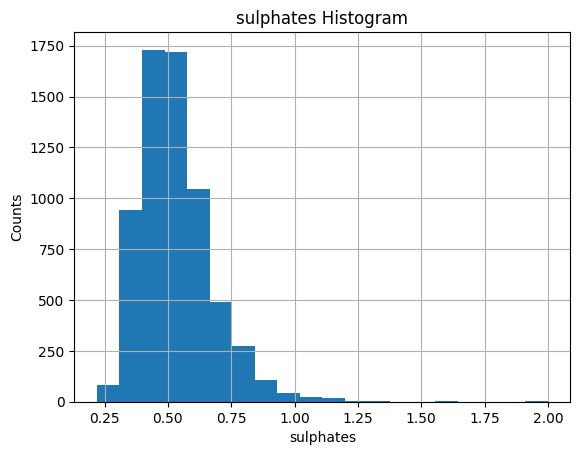

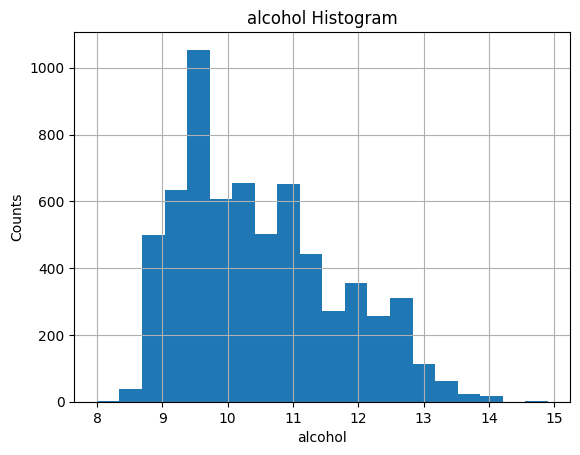

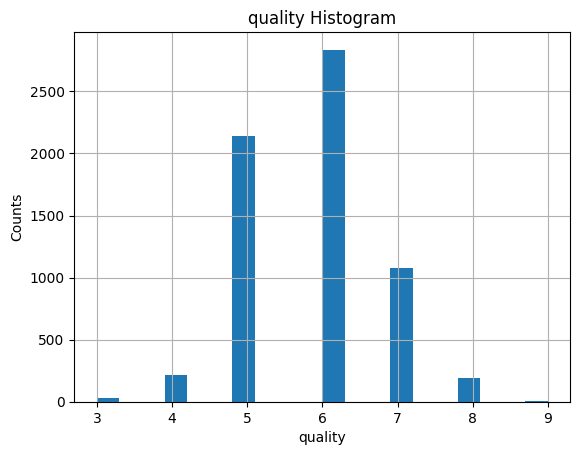

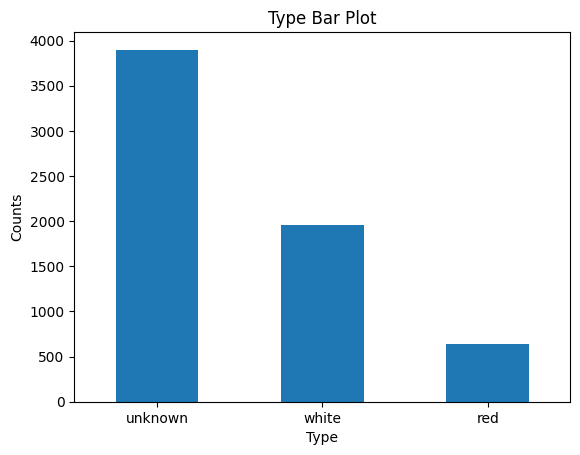

In [33]:
#Print Histograms
def plot_hist(df: DataFrame, exclusion: str):
  # print('---------------------------------------------------------------------------------------------------------')
  # print('Plots for train set') if train else print(f'Plots for test set')
  for column in df.columns:
    if column != exclusion:
      df[column].hist(bins=20)
      plt.title(f'{column} Histogram')
      plt.xlabel(f'{column}')
      plt.ylabel('Counts')
      plt.show()
      print('\n')

plot_hist(df, 'type')

#For Type column display a bar plot
df['type'].value_counts().plot.bar()
plt.title('Type Bar Plot')
plt.xlabel('Type')
plt.xticks(rotation=0) #fix rotation of x axis
plt.ylabel('Counts')
plt.show()

# 2-4. Preprocessing & Data Spliting

In [34]:
df.loc[df['type'] == 'unknown','type'] = 2
df.loc[df['type'] == 'red','type'] = 1
df.loc[df['type'] == 'white','type'] = 0

df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,2,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [35]:
x = df.drop(columns='type').to_numpy()
y = df['type'].to_numpy()

x.shape, y.shape

((6497, 12), (6497,))

In [36]:
x_known = []
y_known = []
x_unknown = []

for i in range(len(x)):
  if y[i] == 2:
    x_unknown.append(x[i])
  else:
    x_known.append(x[i])
    y_known.append(y[i])

x_unknown = np.array(x_unknown)
x_known = np.array(x_known)
y_known = np.array(y_known)

x_unknown.shape, x_known.shape, y_known.shape

((3898, 12), (2599, 12), (2599,))

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, test_size = 0.3, random_state = 0, stratify = y_known)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1819, 12), (1819,), (780, 12), (780,))

# 5 & 6. Training

In [38]:
model = RandomForestClassifier(random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy of our model is: {accuracy}')
print(f'Precision of our model is: {precision}')
print(f'Recall of our model is: {recall}')
print(f'F1-Score of our model is: {f1}')

Accuracy of our model is: 0.9935897435897436
Precision of our model is: 0.9895287958115183
Recall of our model is: 0.984375
F1-Score of our model is: 0.9869451697127938


For imbalanced datasets using F1-Score is more representative than accuracy. This is because it provides a much better indication on how well our model is performing on both the majority and minority classes. Accuracy as a metric will more than likely give us optimistic results solely based on predictions made in the majority class.

In [39]:
model = RandomForestClassifier(class_weight = 'balanced', random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy of our model with class weight balanced is: {accuracy}')
print(f'Precision of our model with class weight balanced is: {precision}')
print(f'Recall of our model with class weight balanced is: {recall}')
print(f'F1-Score of our model with class weight balanced is: {f1}')

Accuracy of our model with class weight balanced is: 0.9948717948717949
Precision of our model with class weight balanced is: 0.9895833333333334
Recall of our model with class weight balanced is: 0.9895833333333334
F1-Score of our model with class weight balanced is: 0.9895833333333334


Mode 'balanced' is used to automatically adjust the weights using values of y. This is done in a inverse propositional to the class frequencies manner.

# 7-9. Semi-Supervised and Retraining

In [40]:
y_unknown_proba=model.predict_proba(x_unknown)

y_unknown_pred = np.where(y_unknown_proba[:, 1] > 0.7, 1,
                          np.where(y_unknown_proba[:, 0] < 0.3, 0, 2))

mask = y_unknown_pred != 2

x_unknown_filtered = x_unknown[mask]
y_unknown_pred_filtered = y_unknown_pred[mask]

x_unknown_filtered.shape, y_unknown_pred_filtered.shape

((899, 12), (899,))

In [41]:
x_train_concat = np.concatenate((x_train, x_unknown_filtered))
y_train_concat = np.concatenate((y_train, y_unknown_pred_filtered))

In [42]:
model = RandomForestClassifier(class_weight = 'balanced', random_state=0)
model.fit(x_train_concat, y_train_concat)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy of our model with class weight balanced is: {accuracy}')
print(f'Precision of our model with class weight balanced is: {precision}')
print(f'Recall of our model with class weight balanced is: {recall}')
print(f'F1-Score of our model with class weight balanced is: {f1}')

Accuracy of our model with class weight balanced is: 0.9935897435897436
Precision of our model with class weight balanced is: 0.9895287958115183
Recall of our model with class weight balanced is: 0.984375
F1-Score of our model with class weight balanced is: 0.9869451697127938


From what we can see from the results the already (almost) perfect performance of our algorithms didnt seem to improve a by a significant margin.